# The purpose of the study is to leverage Machine learning models to best predict customers yearly spending on ecommerce site Flipkart.

The 2 machine learning models used here are:-

1. Random Forest Regression
2. K Nearest Neighbour

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np

#Importing the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing the required statistical libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats.mstats import normaltest
import optuna

#Importing the machine learning libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Atleast from the initial analysis the data is stored correctly with str data in object data type and numerical data in float data type

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


The data doesn't seems to be very skewed from the above table but let's understand that better

In [7]:
df.shape

(500, 8)

The data frame has 500 records and 8 columns

In [8]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

The dataset is pretty straight forward with no missing data

In [9]:
df = df.drop(['Email', 'Address', 'Avatar'], axis=1) #these columns doesn't seem to be of any use for analysis

In [10]:
df.head() #making sure that the columns have actually been dropped

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


# EDA

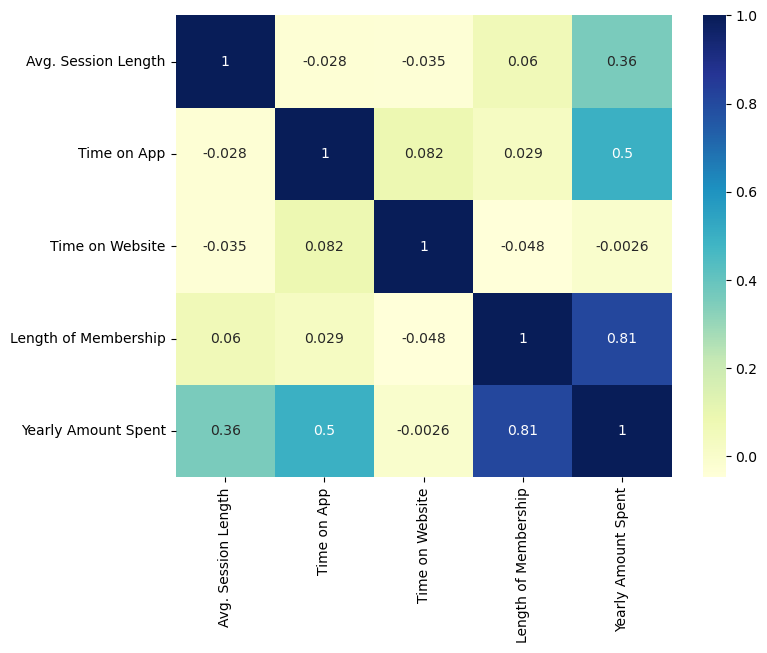

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

From the above heatmap it's clear that:-

1. The length of membership and yearly amount spent are highly correlated with each other.
2. Time on website doesn't seem to be of any use due to it's nature of correlation so we can drop it.

In [12]:
df = df.drop(['Time on Website'], axis=1)

In [13]:
df.head() #making sure that the column has actually been dropped

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

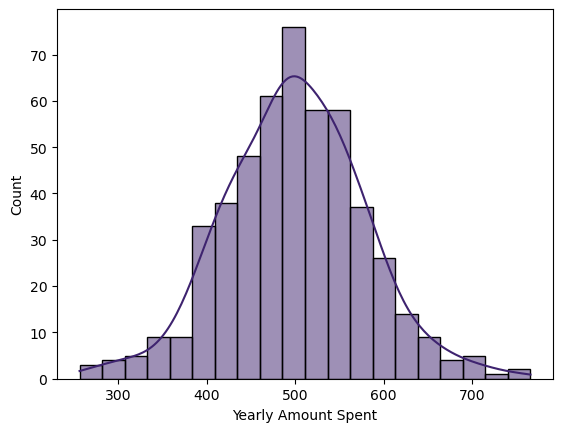

In [14]:
sns.histplot(data=df, x='Yearly Amount Spent', kde=True, color='#3e236f')

The data seems to be normally distributed so it wouldn't require log transformation

/Users/rajeevr/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; p

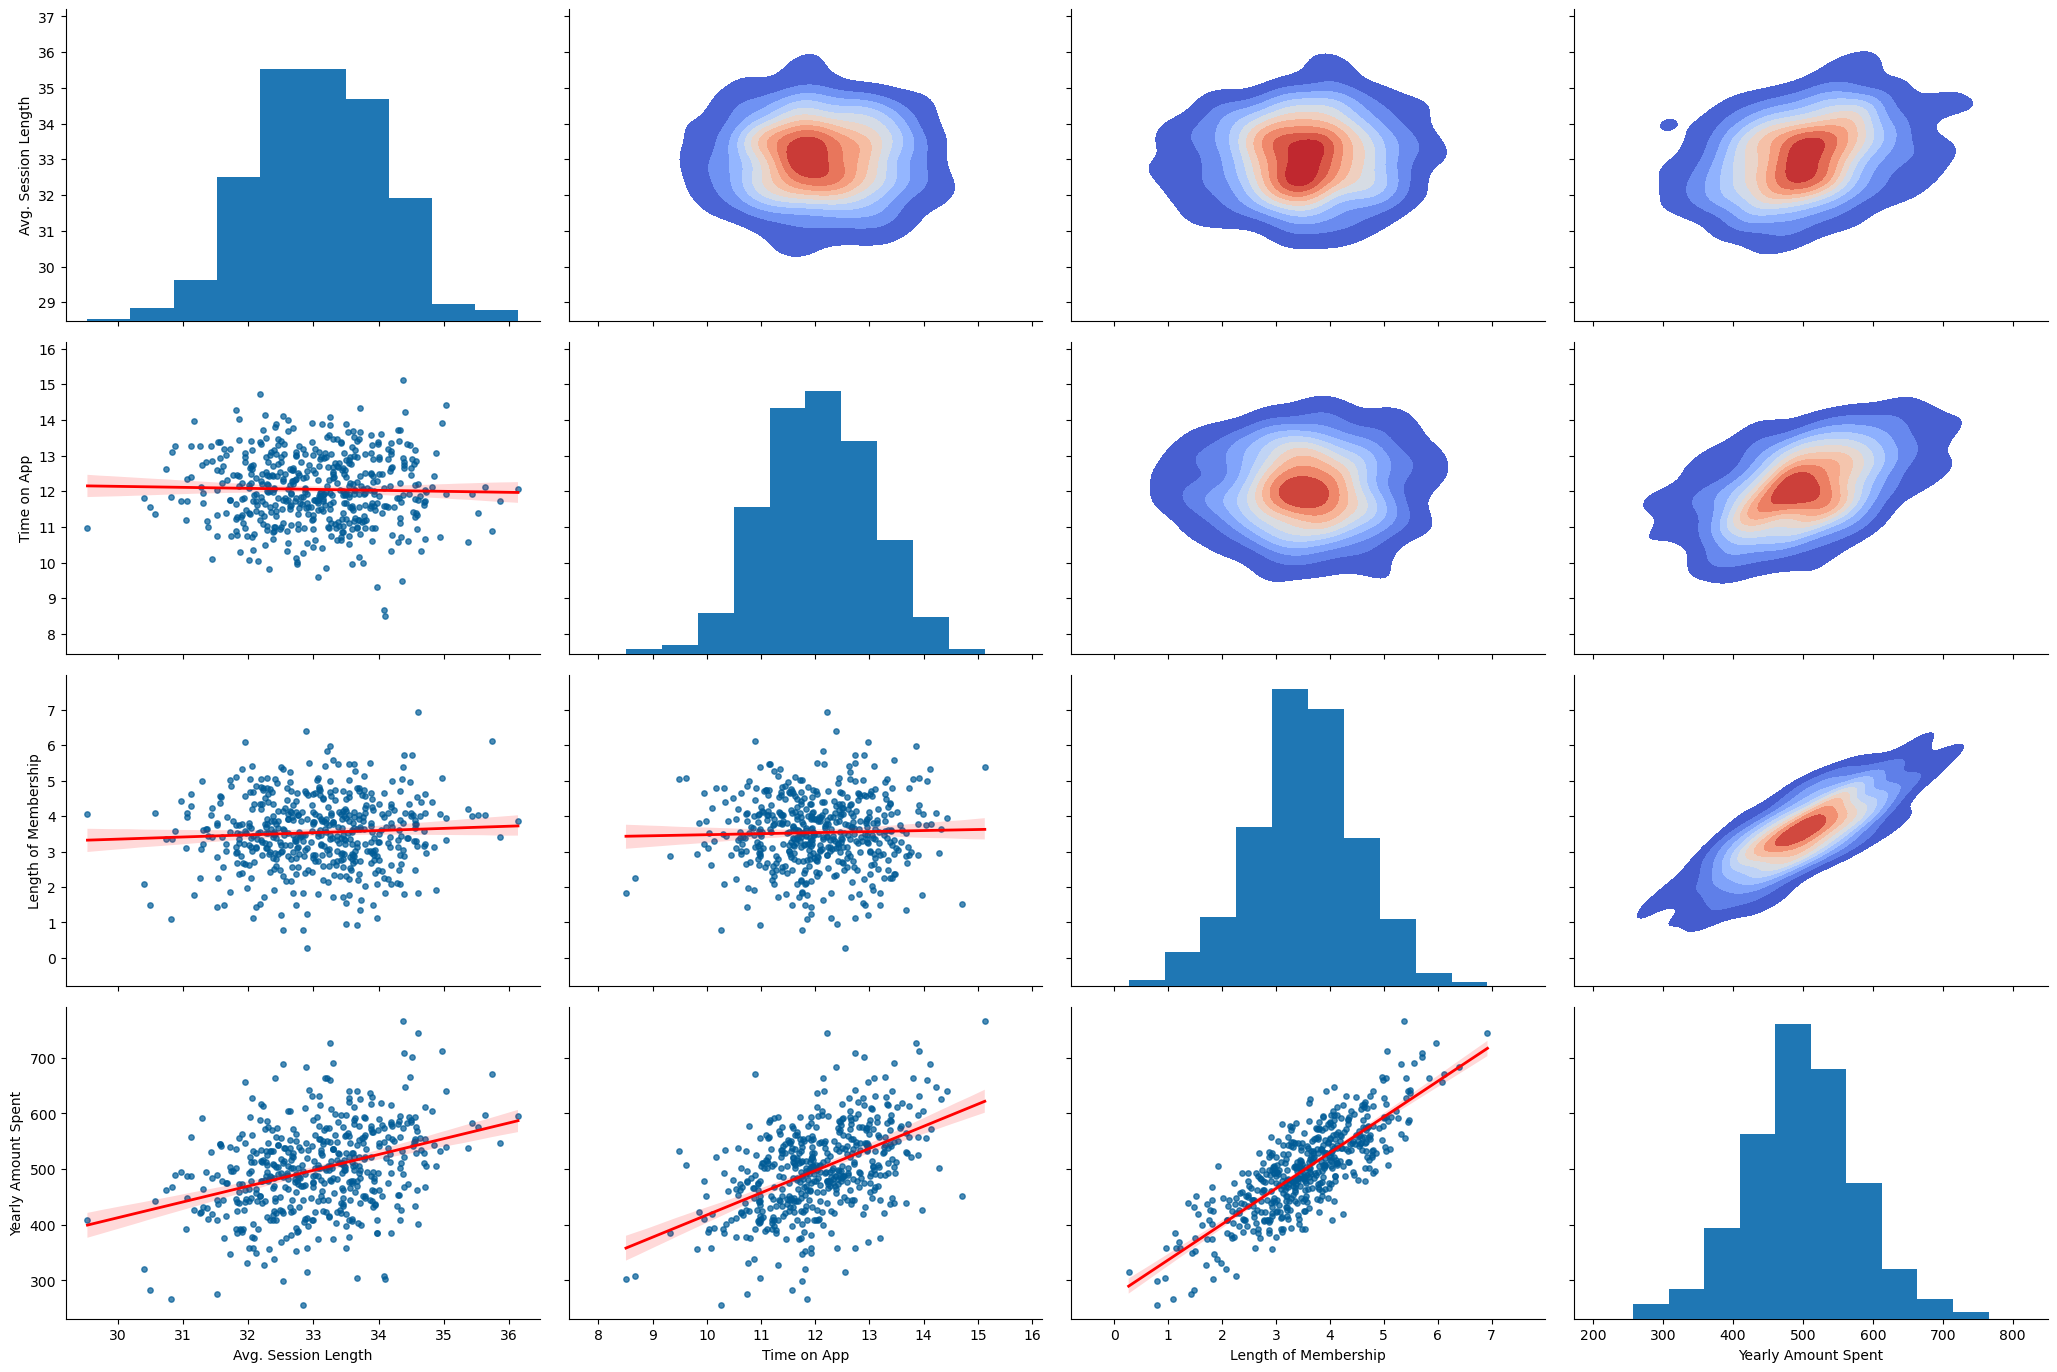

In [15]:
grid = sns.PairGrid(df, vars=['Avg. Session Length', 'Time on App', 'Length of Membership', 'Yearly Amount Spent'],
                    height = 3.5, aspect= 1.5)

grid = grid.map_diag(plt.hist)
grid = grid.map_lower(sns.regplot, scatter_kws = {'s': 15, 'alpha': 0.7, 'color': '#005b96'},
                      line_kws = {'color': 'red', 'linewidth': 2})
grid = grid.map_upper(sns.kdeplot, n_levels=11, cmap= 'coolwarm', shade = True)

plt.show()

There is definitely a relationship btw our target variable and length of membership and clearly all our features and the target variable has a bell shaped curve.

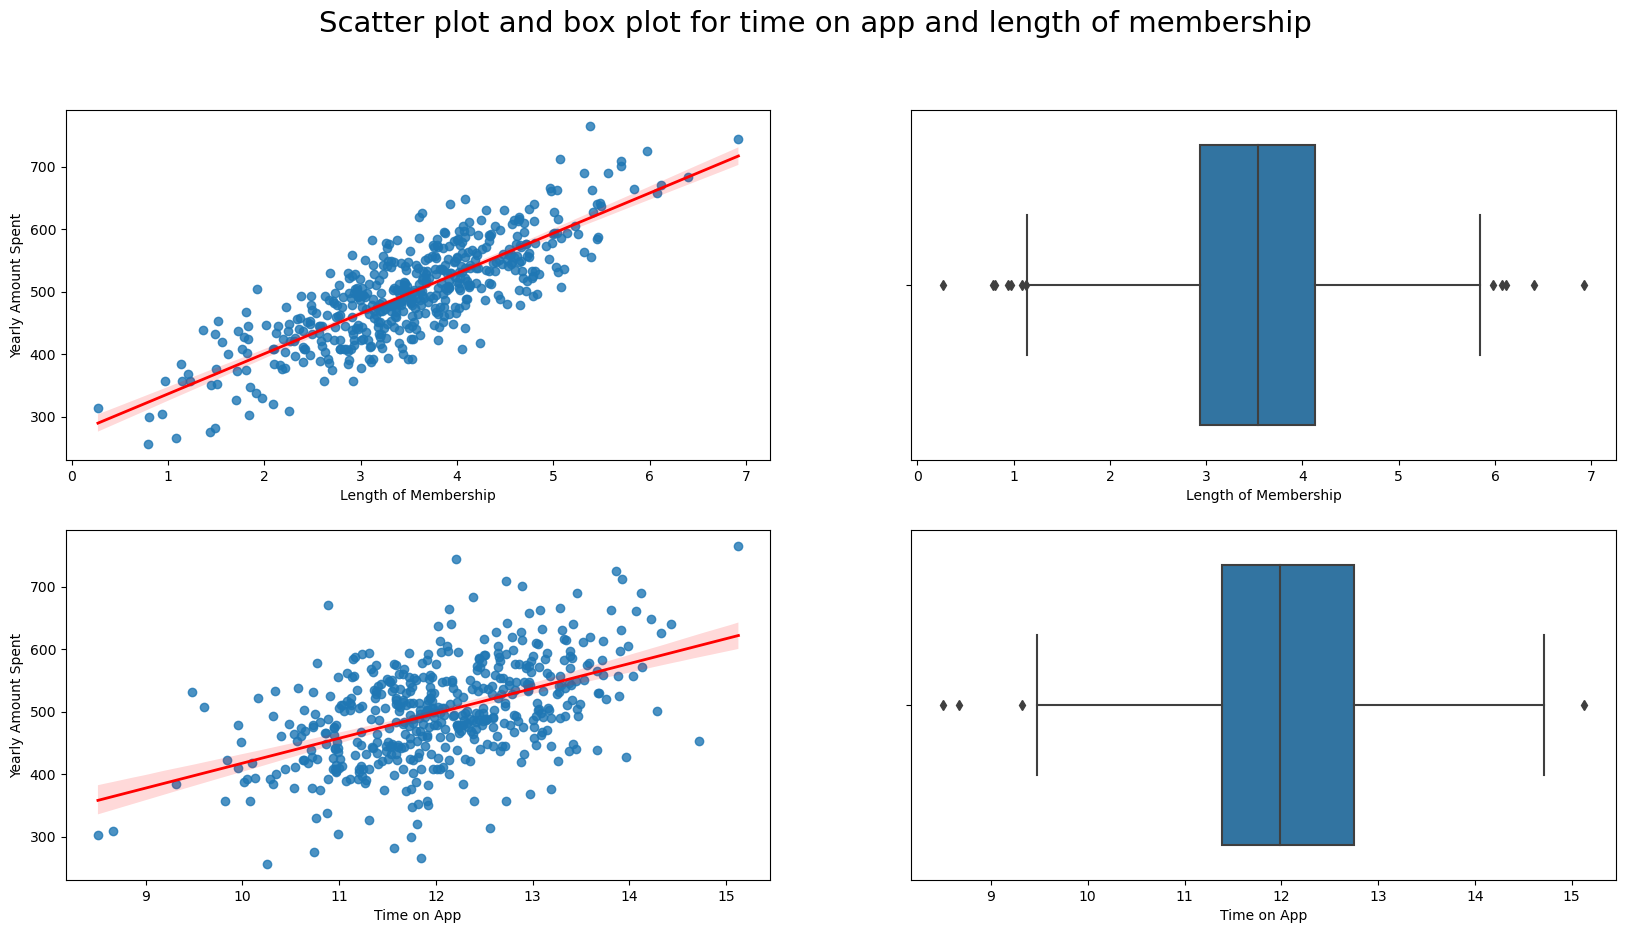

In [16]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
fig.suptitle('Scatter plot and box plot for time on app and length of membership', fontsize=21)

sns.regplot(x=df['Length of Membership'], y=df['Yearly Amount Spent'], data=df,
            line_kws = {'color': 'red', 'linewidth': 2}, ax=axs[0,0])
sns.boxplot(x=df['Length of Membership'], ax=axs[0,1])


sns.regplot(x=df['Time on App'], y=df['Yearly Amount Spent'],
           line_kws={'color': 'red', 'linewidth': 2}, ax=axs[1,0])
sns.boxplot(x=df['Time on App'], ax=axs[1,1])

plt.show()


In [17]:
#Creating a copy of the original df
df1 = df.copy()

In [18]:
df1.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


# Scaling and Splitting

In [19]:
#It's very clear that yearly amount spent variable is of much importance so let's drop it on the x axis for analysis

x = df1.drop(['Yearly Amount Spent'], axis=1)
y = df1['Yearly Amount Spent']

In [20]:
#Lets scale the variable for optimal results

scaler = StandardScaler()
scaler.fit(x)
x = scaler.fit_transform(x)

In [21]:
#test size is 0.2 and we're randomnly starting the initialization at 42

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
kf = KFold(n_splits=2)

# Random Forest 

In [23]:
#Establishing parameters in the random forest model

def random_forest_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 600)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    
    model = RandomForestRegressor(
    n_estimators = n_estimators,
    max_depth = max_depth,
    bootstrap= bootstrap
    )
    
    model.fit(X_train, y_train)
    cv_score = - cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    
    return np.mean(cv_score)

study = optuna.create_study(direction = 'minimize')
study.optimize(random_forest_objective, n_trials=10)

[I 2023-05-02 14:09:35,309] A new study created in memory with name: no-name-8cf0011a-1b65-4565-806f-816c021456b2
[I 2023-05-02 14:09:36,962] Trial 0 finished with value: 1060.2149726335645 and parameters: {'n_estimators': 548, 'max_depth': 16, 'bootstrap': False}. Best is trial 0 with value: 1060.2149726335645.
[I 2023-05-02 14:09:37,542] Trial 1 finished with value: 1056.7776813207618 and parameters: {'n_estimators': 195, 'max_depth': 15, 'bootstrap': False}. Best is trial 1 with value: 1056.7776813207618.
[I 2023-05-02 14:09:38,762] Trial 2 finished with value: 1392.8677567529644 and parameters: {'n_estimators': 515, 'max_depth': 6, 'bootstrap': False}. Best is trial 1 with value: 1056.7776813207618.
[I 2023-05-02 14:09:40,188] Trial 3 finished with value: 509.0113172043234 and parameters: {'n_estimators': 478, 'max_depth': 31, 'bootstrap': True}. Best is trial 3 with value: 509.0113172043234.
[I 2023-05-02 14:09:41,134] Trial 4 finished with value: 500.88874810432213 and parameters

# KNN

In [24]:
#Establishing parameters in KNN model

def KNN_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 1, 20)
    leaf_size = trial.suggest_int('max_depth', 1, 50)
    
    model = KNeighborsRegressor(
    n_neighbors = n_estimators,
    leaf_size = leaf_size
    )
    
    model.fit(X_train, y_train)
    cv_score = - cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv=kf)
    
    return np.mean(cv_score)

study = optuna.create_study(direction = 'minimize')
study.optimize(KNN_objective, n_trials=10)

[I 2023-05-02 14:09:45,689] A new study created in memory with name: no-name-e75a5e26-8a80-4415-b935-211ac3f17852
[I 2023-05-02 14:09:45,706] Trial 0 finished with value: 859.445607167461 and parameters: {'n_estimators': 14, 'max_depth': 7}. Best is trial 0 with value: 859.445607167461.
[I 2023-05-02 14:09:45,715] Trial 1 finished with value: 651.4331512152391 and parameters: {'n_estimators': 7, 'max_depth': 43}. Best is trial 1 with value: 651.4331512152391.
[I 2023-05-02 14:09:45,722] Trial 2 finished with value: 737.7052225813412 and parameters: {'n_estimators': 10, 'max_depth': 33}. Best is trial 1 with value: 651.4331512152391.
[I 2023-05-02 14:09:45,730] Trial 3 finished with value: 651.4331512152391 and parameters: {'n_estimators': 7, 'max_depth': 26}. Best is trial 1 with value: 651.4331512152391.
[I 2023-05-02 14:09:45,748] Trial 4 finished with value: 737.7052225813412 and parameters: {'n_estimators': 10, 'max_depth': 1}. Best is trial 1 with value: 651.4331512152391.
[I 2023

In [25]:
#From the results above, manually selecting the parameters that best suits the model

random_forest_params = {
    'n_estimators': 442, 
    'max_depth': 8, 
    'bootstrap': False}

knn_params = {
    'n_neighbors': 5, 
    'leaf_size': 30}

In [26]:
#creating a variable models for storing both the models

models = {'random forest': RandomForestRegressor(**random_forest_params),
    'knn': KNeighborsRegressor(**knn_params)}

In [27]:
#Fitting the model and printing trained once it's trained

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " " + "trained")

random forest trained
knn trained


In [28]:
#Lets leverage both the trained models for analysis equally

final_predictons = (0.5 * models['random forest'].predict(X_test) +
                    0.5 * models['knn'].predict(X_test))

In [29]:
#Root mean squared error and the variance

rmse = np.sqrt(mean_squared_error(y_test, final_predictons))
r2 = r2_score(y_test, final_predictons)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 16.022253677538423
R-square: 0.9481569940250786


Since the R2 value is close to 1 we can say that the model is performing decently well 

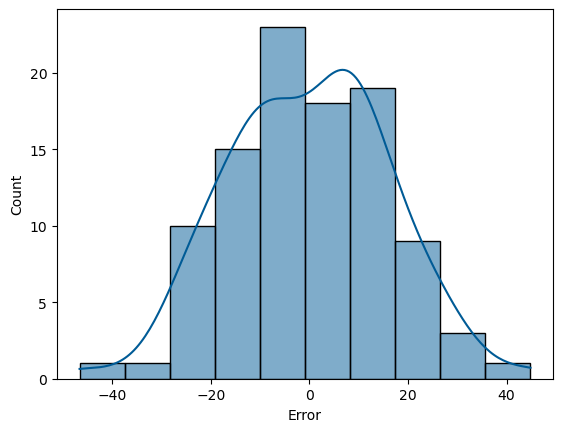

0.368

In [30]:
#Distribution of errors

sns.histplot(y_test - final_predictons, color='#005b96', kde=True)
plt.xlabel('Error')
plt.show()

normaltest(final_predictons).pvalue.round(3)

The normal test above explains the normality and checks if the sample comes from a normal distribution. Since the pvalue here is 0.362 ie (p>0.05) we accept the null hypothesis and thereby conclude that the sample comes from a normal distribution